#  PHYSICAL MODELS OF LIVING SYSTEMS

## Homework - week 3

Author: Nguyen Xuan Tung

Id: 2005491
    

----------------------------------------------------------------------------------------------------------

Consider the Lotka-Volterra equations:

$$ \frac{dx}{dt} = ax - pxy  $$ 
$$ \frac{dy}{dt} = -cx + pxy $$ 




1) Find the stationary solutions

2) Do the stability analysis of the stationary solutions. Is there any stable solution?

3) (optional) simulate Eqs.(1)-(2) with different parameters. Is there a range of parameters where do you observe sustained oscillations?

------------------------------------------------------------------------------------

Stationary solution for Lotka-Volterra: Critical points occur when dx/dt=dy/dt=0, so:

$$ a - py = 0 $$

$$ -c + px = 0 $$

The stationary points located at (x,y) are $(\frac{c}{p}, \frac{a}{p})$ and (0,0)

Stability analysis

For the stationary point (0,0), the Jacobian maxtrix is
$ \begin{pmatrix}
    a & 0 \\
    0 & -c 
   \end{pmatrix}
$
, the eigen values are "a" and "-c" $\rightarrow$ it is saddle point. 

For the stationary point $(\frac{c}{p}, \frac{a}{p})$, the Jacobian matrix is: 
$ \begin{pmatrix}
    0 & -c \\
    a & 0 
   \end{pmatrix}
$
, the eigen values are $ i \sqrt(ca) $ and $ -i \sqrt(ca) $ $\rightarrow$ it is a center.

In order to have the stable solution, both the real parts of eigenvalues are negative.  


In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

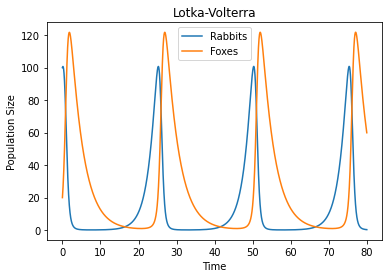

In [51]:
# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 80

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 0.5
# death rate of rabbits due to predation (p in the formula)
b = 0.02
# natural death rate of foxes 
c = 0.3
# factor that describes how many eaten rabbits give birth to a new fox (p in the formula)
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20)

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()
    

The sustain oscillations gone when the parameter c (natural death rate of foxes) drops below 0.07 or the parameter a (birth rate of rabbits) drops below 0.1